In [1]:
py_files_path = '../'
import sys
sys.path.append(py_files_path)

In [2]:
import pandas as pd
import json
from tqdm import tqdm
from collections import Counter

from datasets import build_vocab

In [3]:
file_path = '../dataset_flickr8k.json'
with open(file_path, 'r') as f:
    data = json.load(f)

In [4]:
df = pd.read_csv("../data.csv")
df.head()

,file_name,split,caption
0,2513260012_03d33305cf.jpg,train,A black dog is running after a white dog in th...
1,2513260012_03d33305cf.jpg,train,Black dog chasing brown dog through snow
2,2513260012_03d33305cf.jpg,train,Two dogs chase each other across the snowy gro...
3,2513260012_03d33305cf.jpg,train,Two dogs play together in the snow .
4,2513260012_03d33305cf.jpg,train,Two dogs running through a low lying body of w...


In [5]:
vocab = build_vocab('../data.csv')

KeyboardInterrupt: 

In [ ]:
capt = df['caption'][0]

In [19]:
vocab.tokenize_en(capt)

['a',
 'black',
 'dog',
 'is',
 'running',
 'after',
 'a',
 'white',
 'dog',
 'in',
 'the',
 'snow',
 '.']

In [19]:
file_names = []
splits = []
captions = []
tokens = []
tok_len = []
word_freq = Counter()
max_len = 100

for img in tqdm(data['images'], position=0):
    for sent in img['sentences']:
        file_names.append(img['filename'])
        captions.append(sent['raw'])
        splits.append(img['split'])
        
        ## tokens
        if len(sent['tokens']) <= max_len:
            tokens.append(sent['tokens'])
            tok_len.append(len(sent['tokens']))

100%|██████████| 8000/8000 [00:00<00:00, 162654.24it/s]


In [20]:
len(tok_len)

40000

In [21]:
df = pd.DataFrame({
    'file_name': file_names,
    'split': splits,
    'caption': captions,
    'tok_len': tok_len,
    'tokens': tokens
})

In [22]:
df.head()

,file_name,split,caption,tok_len,tokens
0,2513260012_03d33305cf.jpg,train,A black dog is running after a white dog in th...,12,"[a, black, dog, is, running, after, a, white, ..."
1,2513260012_03d33305cf.jpg,train,Black dog chasing brown dog through snow,7,"[black, dog, chasing, brown, dog, through, snow]"
2,2513260012_03d33305cf.jpg,train,Two dogs chase each other across the snowy gro...,9,"[two, dogs, chase, each, other, across, the, s..."
3,2513260012_03d33305cf.jpg,train,Two dogs play together in the snow .,7,"[two, dogs, play, together, in, the, snow]"
4,2513260012_03d33305cf.jpg,train,Two dogs running through a low lying body of w...,10,"[two, dogs, running, through, a, low, lying, b..."


<AxesSubplot:>

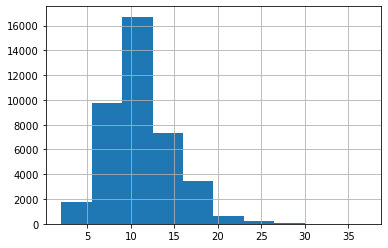

In [23]:
df.tok_len.hist()

In [24]:
df.to_json("../data.json")

In [3]:
df = pd.read_json("../data.json")
df.head()

,file_name,split,caption,tok_len,tokens
0,2513260012_03d33305cf.jpg,train,A black dog is running after a white dog in th...,12,"[a, black, dog, is, running, after, a, white, ..."
1,2513260012_03d33305cf.jpg,train,Black dog chasing brown dog through snow,7,"[black, dog, chasing, brown, dog, through, snow]"
2,2513260012_03d33305cf.jpg,train,Two dogs chase each other across the snowy gro...,9,"[two, dogs, chase, each, other, across, the, s..."
3,2513260012_03d33305cf.jpg,train,Two dogs play together in the snow .,7,"[two, dogs, play, together, in, the, snow]"
4,2513260012_03d33305cf.jpg,train,Two dogs running through a low lying body of w...,10,"[two, dogs, running, through, a, low, lying, b..."


In [4]:
df.tok_len.max()

37